### 27.1.3 자동으로 파일 객체 닫기
- 파일을 열 때마다 매번 close로 닫으려니 귀찮음
- 파이썬에는 with as 를 사용하면 파일을 사용한 뒤 자동으로 객체를 닫아줌

In [10]:
file = open('hello.txt', 'w')
file.write('Hello World')
file.close()

Hello World


In [12]:
file = open('hello.txt', 'r')
s= file.read()
print(s)
file.close()

Hello World


In [15]:
with open('hello.txt', 'r') as file:
    s = file.read()
    print(s)

Hello World


### 27.2.2 리스트에 들어있는 문자열을 파일에 쓰기

In [16]:
lines = ['안녕하세요\n', '파이썬\n', '코딩 도장\n']

with open('hello.txt', 'w') as file:
    file.writelines(lines)

### 27.2.3 파일의 내용을 한줄씩 리스트로 가져오기

In [18]:
with open('hello.txt', 'r') as file:
    lines = file.readlines()
    print(lines)

['안녕하세요\n', '파이썬\n', '코딩 도장\n']


In [22]:
with open('hello.txt', 'r') as file:
    line = None
    while line != '':
        line = file.readline()
        print(line.strip('\n'))

안녕하세요
파이썬
코딩 도장



In [29]:
with open('hello.txt', 'r') as file:
    for line in file:
        print(line.strip('\n'))

안녕하세요
파이썬
코딩 도장


### 27.5 연습문제: 파일에서 10자 이하인 단어 개수 세기

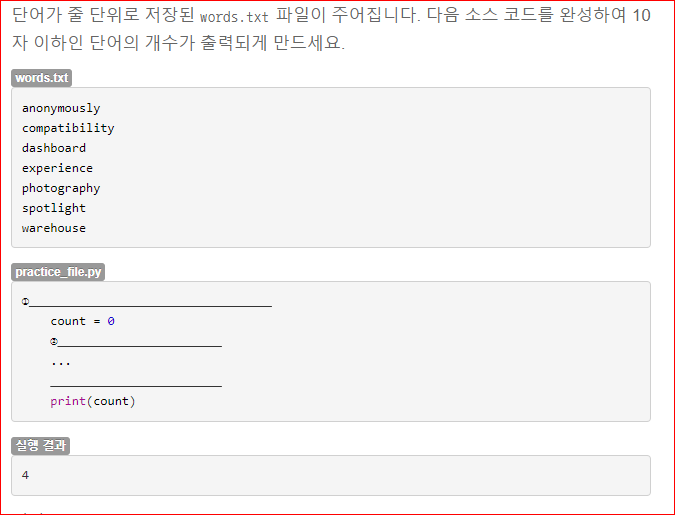

In [33]:
with open('hello.txt', 'r') as file:
    count = 0
    words = file.readlines()
    for word in words:
        if len(word.strip('\n')) >= 4:
            count += 1
    print(count)

2


### 28.1 회문 판별하기

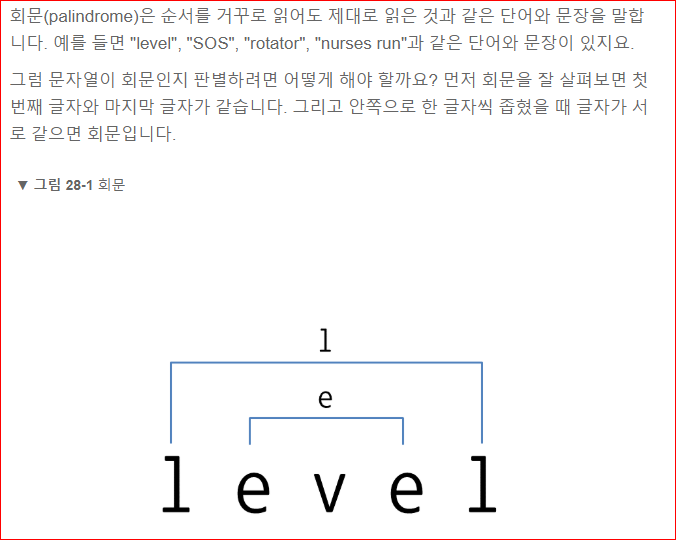

### 28.1.1 반복문으로 문자 검사하기

In [38]:
word = input('단어를 입력하세요: ')

is_palindrome = True   # 회문 판별값을 저장할 변수, 초깃값은 True
for i in range(len(word)//2):   # 0 부터 문자열 길이의 절반만큼 반복
    if word[i] != word[-1 -i]:   # 왼쪽 문자와 오른쪽 문자를 비교하여 문자가 다르면
        is_palindrome = False    # 회문이 아님
        break
        
print(is_palindrome)

단어를 입력하세요: 가나다나가
True


### 28.1.2 시퀀스 뒤집기로 문자 검사하기

In [39]:
word = input('단어를 입력하세요: ')

print(word == word[::-1]) # 원래 문자열과 반대로 뒤집은 문자열을 비교

단어를 입력하세요: level
True


### 28.1.3 리스트와 reversed 사용하기

In [40]:
word = input('단어를 입력하세여: ')
list(word) == list(reversed(word))

단어를 입력하세여: level


True

### 28.2 N-gram 만들기

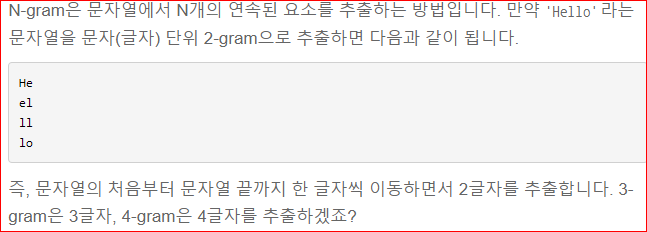

### 28.2.1 반복문으로 N-gram 출력하기

In [54]:
text = 'hello'

for i in range(len(text) -1):  # 2-gram 이므로 문자열의 끝에서 한 글자 앞까지만 반복
    print(text[i], text[i+1], sep = '')
    

he
el
ll
lo


In [56]:
text = 'hello'

for i in range(len(text) -2):  # 3-gram 이므로 문자열의 끝에서 한 글자 앞까지만 반복
    print(text[i], text[i+1], text[i+2], sep = '')

hel
ell
llo


### 단어 단위 N-gram

In [57]:
text = 'this is python script'
words = text.split()

for i in range(len(words) - 1):   # 2-gram
    print(words[i], words[i+1])   # 현재 문자열과 그 다음 문자열 출력

this is
is python
python script


### 28.2.2 zip 함수로 2-gram 만들기

In [73]:
text = 'hello'
two_gram = zip(text, text[1:])
for i in two_gram:
    print(i[0], i[1], sep='')

he
el
ll
lo


In [74]:
text = 'hello'
list(zip(text,text[1:]))

[('h', 'e'), ('e', 'l'), ('l', 'l'), ('l', 'o')]

### 28.2.3 zip과 리스트 표현식으로 N-gram 만들기

In [77]:
text = 'hello'
[text[i:] for i in range(3)]

['hello', 'ello', 'llo']

In [78]:
list(zip(['hello', 'ello', 'llo']))

[('hello',), ('ello',), ('llo',)]

In [81]:
list(zip(*['hello', 'ello', 'llo']))  # zip에 리스트의 각 요소를 콤마로 구분해서 넣어주려면
                                     # 리스트 앞에 *를 붙여야 합니다

[('h', 'e', 'l'), ('e', 'l', 'l'), ('l', 'l', 'o')]

In [82]:
list(zip(*[text[i:] for i in range(3)]))

[('h', 'e', 'l'), ('e', 'l', 'l'), ('l', 'l', 'o')]

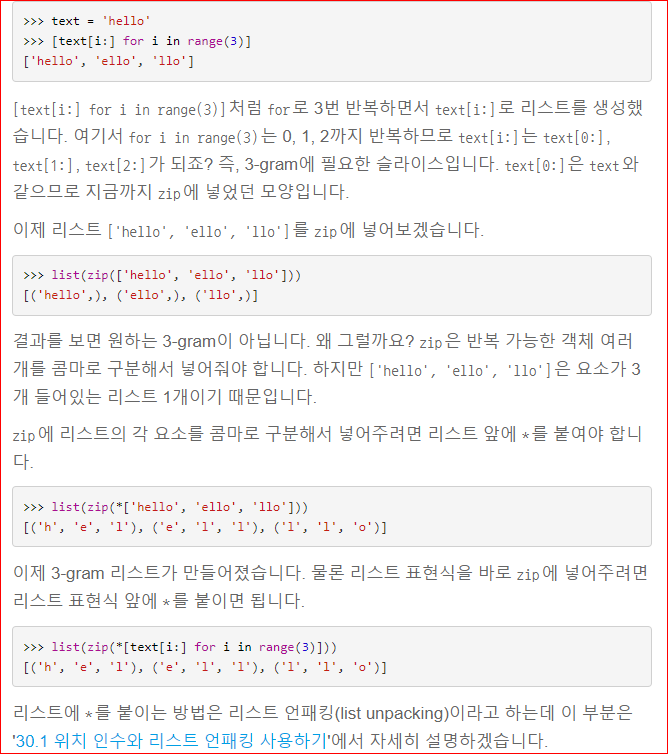

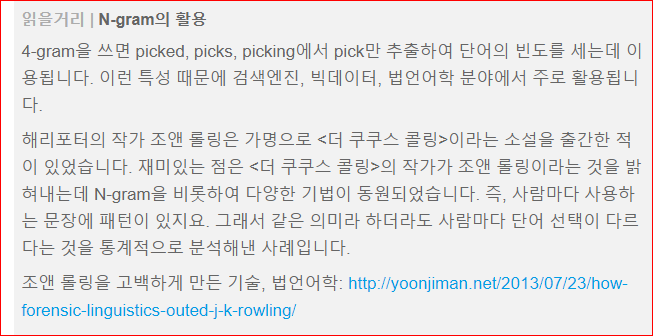

### 28.3 연습문제: 단어 단위 N-gram 만들기

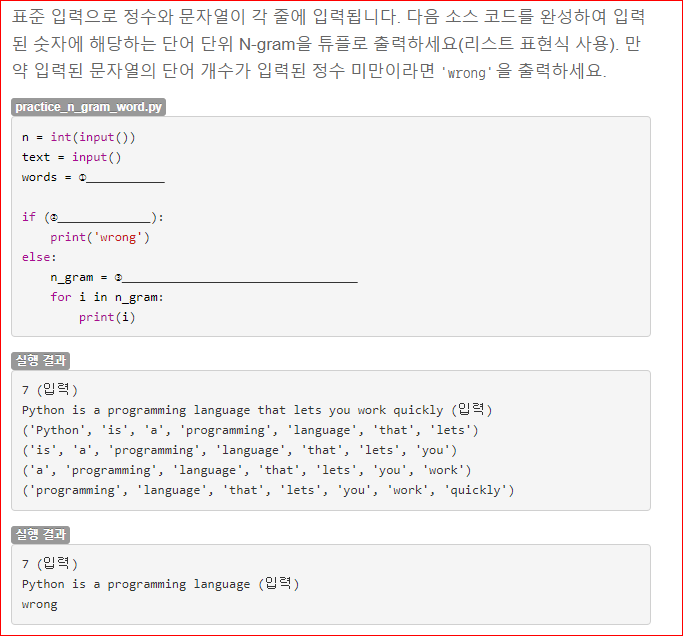

In [85]:
n = int(input())
text = input()
words = text.split()

if len(words) < n:
    print('wrong')
else:
    # zip에 리스트의 각 요소를 콤마로 구분해서 넣을 수 있도록 
    # 리스트 앞에 *를 붙여서 리스트 언패킹을 해줌
    n_gram = zip(*[words[i:] for i in range(n)])  
    for i in n_gram:
        print(i)

3
성재는 이직에 성공해서 곧 입사합니다
('성재는', '이직에', '성공해서')
('이직에', '성공해서', '곧')
('성공해서', '곧', '입사합니다')


In [86]:
n = int(input())
text = input()
words = text.split()

if len(words) < n:
    print('wrong')
else:
    n_gram = zip([words[i:] for i in range(n)])
    for i in n_gram:
        print(i)

3
성재는 이직에 성공해서 곧 입사합니다
(['성재는', '이직에', '성공해서', '곧', '입사합니다'],)
(['이직에', '성공해서', '곧', '입사합니다'],)
(['성공해서', '곧', '입사합니다'],)


### 30.1.2 언패킹 사용하기

In [1]:
x = [10,20,30]

def print_numbers(a,b,c):
    print(a)
    print(b)
    print(c)
print_numbers(*x)

10
20
30


In [2]:
print(*x)

10 20 30


### 30.3 키워드 인수와 딕셔너리 언패킹 사용하기

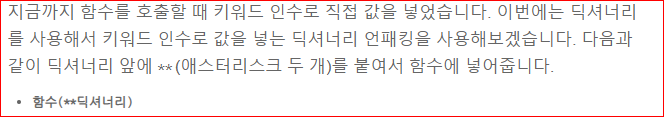

In [4]:
def personal_info(name, age, address):
    print('이름: ', name)
    print('나이: ', age )
    print('주소: ', address)
    
x = {'name': '홍길동', 'age': 30, 'address': '서울시 용산구 이촌동'}
personal_info(**x)

이름:  홍길동
나이:  30
주소:  서울시 용산구 이촌동


In [5]:
# 딕셔너리 변수 대신 딕셔너리 앞에 바로 ** 붙여도 같은 동작
personal_info(**{'name': '홍길동', 'age': 30, 'address': '서울시 용산구 이촌동'})

이름:  홍길동
나이:  30
주소:  서울시 용산구 이촌동


In [10]:
personal_info(*x)
personal_info(**x)

이름:  age
나이:  name
주소:  address
이름:  홍길동
나이:  30
주소:  서울시 용산구 이촌동


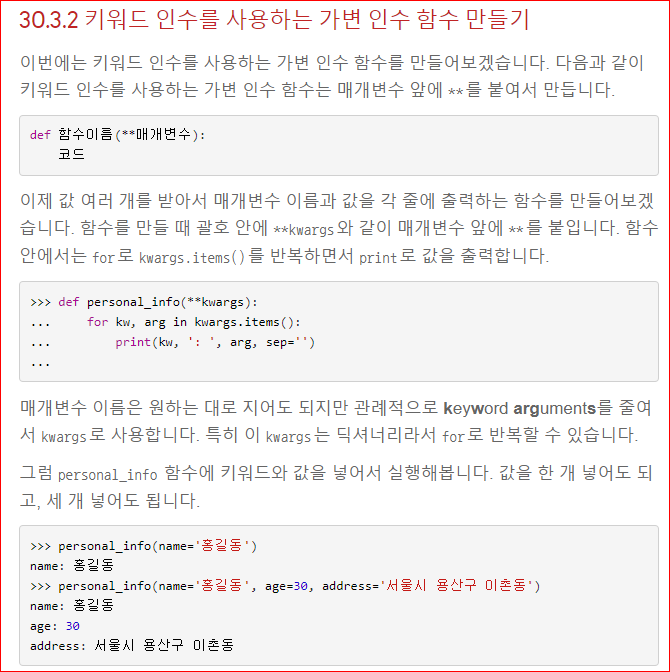

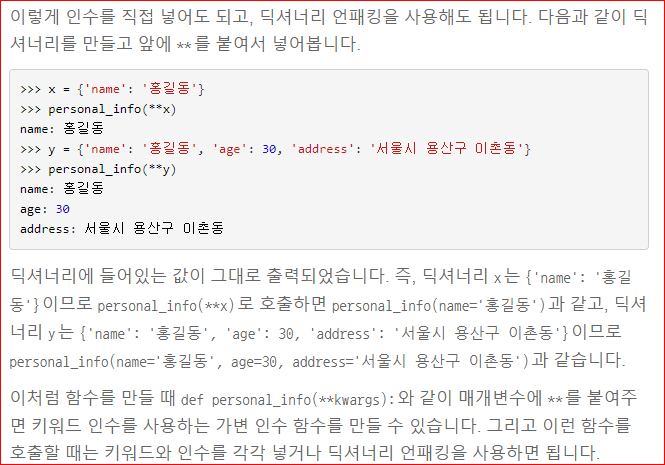

### 함수 안에 특정 키가 있는지 먼저 확인후 해당 기능 생성

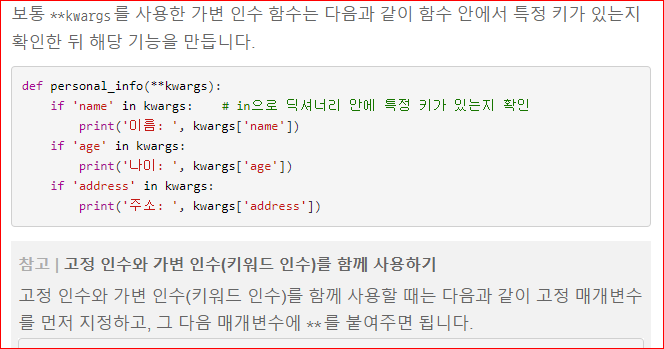

### 30.6 연습문제: 가장 높은 점수를 구하는 함수 만들기

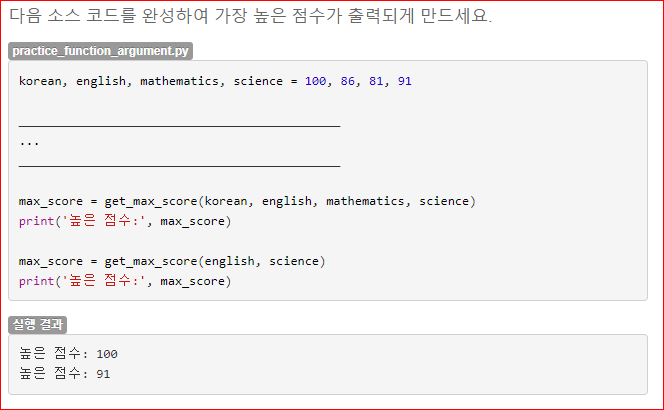

In [16]:
korean, english, mathematics, science = 100, 86, 81, 91

# 호출할 때마다 인수의 개수가 달라지고 있으므로
# 가변 인수 함수로 만들어야 함
def get_max_score(*args):  
    print(args)
    return(max(args))

max_score = get_max_score(korean, english, mathematics, science)
print('높은 점수:', max_score)
 
max_score = get_max_score(english, science)
print('높은 점수:', max_score)

(100, 86, 81, 91)
높은 점수: 100
(86, 91)
높은 점수: 91


### 31.1 재귀호출 사용
- 함수 안에서 자기 자신을 호출하는 방식을 재귀호출(recursive call)이라고 함

In [21]:
# 이것을 실행시키면 최대 재귀 깊이까지 문자열이 출력하다 멈춤 (1000)
def hello():
    print('hello world')
    hello()

hello()

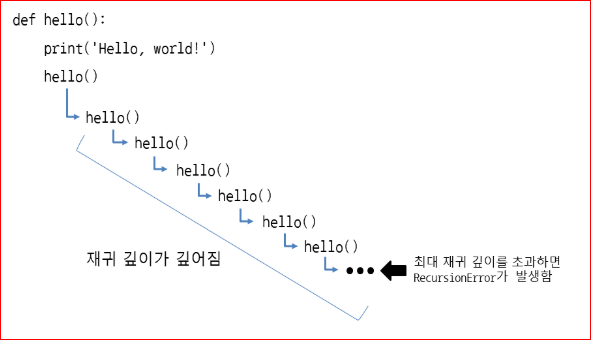

### 31.1.1 재귀호출에 종료 조건 만들기

In [22]:
def hello(count):
    if count==0: # 종료 조건, count가 0이면 다시 hello 함수를 호출하지 않고 끝냄
        return
    
    print('hello world', count)
    
    count -= 1   # 카운트를 1 감소시킨 뒤
    hello(count)  # 다시 hello에 넣음

hello(5)  # hello 함수 호출

hello world 5
hello world 4
hello world 3
hello world 2
hello world 1


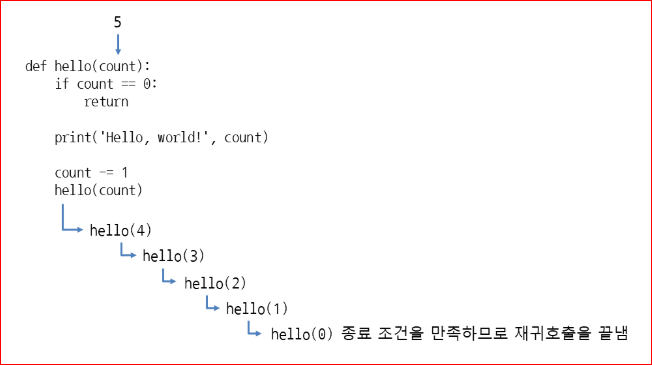

### 31.2 재귀호출로 팩토리얼 구하기

In [23]:
def factorial(n):
    if n==1:     # n이 1일 때
        return 1 # 1을 반환하고 재귀호출 끝냄
    return n * factorial(n-1)   # n과 factorial 함수에 n-1 을 넣어서 반환된 값을 곱함

print(factorial(5))

120


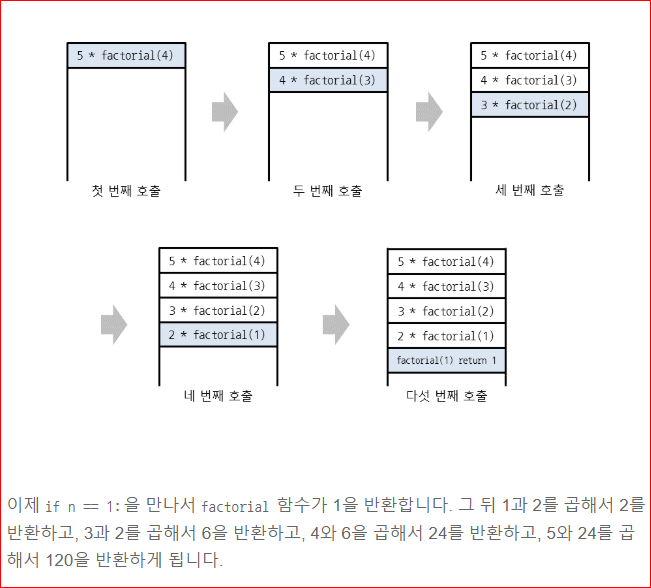

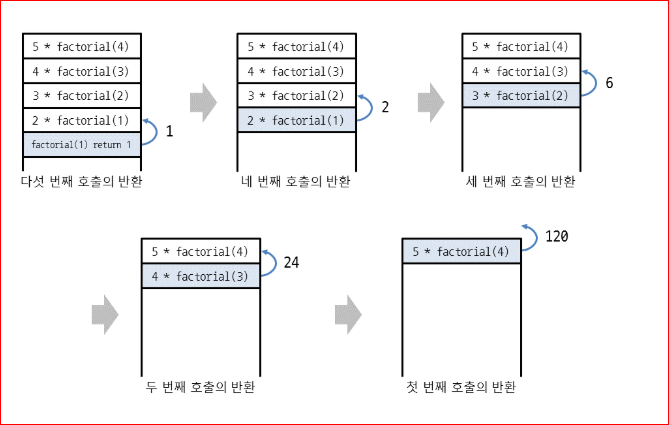

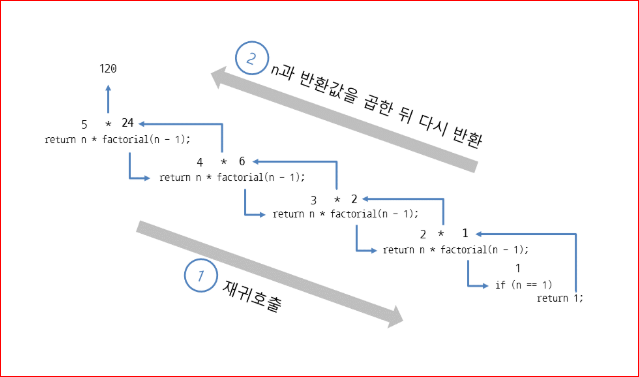

### 31.4 연습문제: 재귀호출로 회문 판별하기

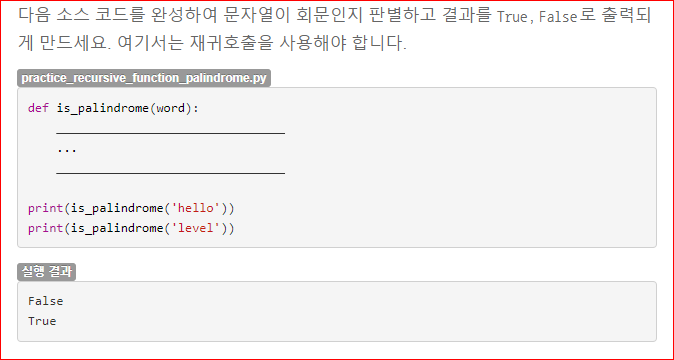

In [30]:
def is_palindrome(word):
    if len(word) < 2:     # 이 부분이 먼저 와야함, 그렇지 않으면 
        return True       # 재귀중 문자가 하나도 없는데도 word[0]에 접근하여 에러발생
    
    if word[0] != word[-1]:   # 첫 문자와 마지막 문자가 다를 떈 False 호출
        return False
    
    return is_palindrome(word[1:-1])  # 현재 문자열의 두번째 문자부터 뒤에서 두 번째 문자까지

print(is_palindrome('hello'))
print(is_palindrome('level'))

False
True


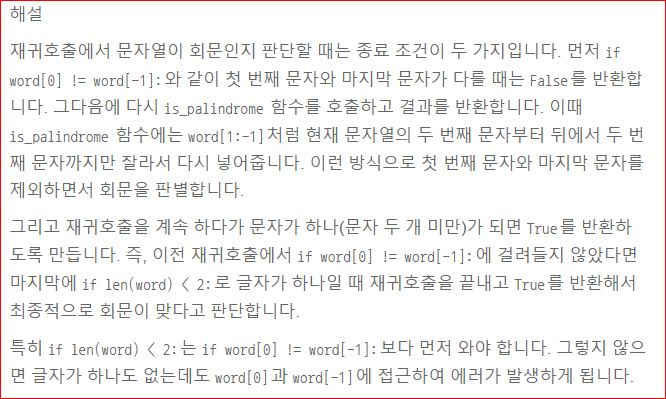